In [ ]:
# Use BeautifulSoup to do web scraping
import bs4
import requests
import time
import random as ran
import sys
import pandas as pd

# Data viz packages
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [ ]:
url = 'https://www.imdb.com/search/title/?groups=top_100'
headers = {"Accept-Language": "en-US, en;q=0.5"}
source = requests.get(url).text
soup = bs4.BeautifulSoup(source,'html.parser')

In [ ]:
# I want to extract these attributes (to a list) from the movie_soup.
movie_name = []
movie_years = []
movie_runtime = []
imdb_ratings = []
metascores = []
number_votes = []
us_gross = []

In [ ]:
# Create a movie_div object to find all div objects in movie_soup.
movie_div = soup.find_all('div', class_='lister-item mode-advanced')

In [ ]:
# Loop through each object in the movie_div.
for container in movie_div:

# Add each result from each attribute for each list.

  # name
  name = container.h3.a.text
  movie_name.append(name)

  # year
  year = container.h3.find('span', class_='lister-item-year').text
  movie_years.append(year)

  # runtime
  runtime = container.p.find('span', class_='runtime').text if container.p.find('span', class_='runtime').text else '-'
  movie_runtime.append(runtime)

  # IMDB rating
  imdb = float(container.strong.text)
  imdb_ratings.append(imdb)

  # metascore
  m_score = container.find('span', class_='metascore').text if container.find('span', class_='metascore') else '-'
  metascores.append(m_score)

  # There are two NV containers, grab both of them as they hold both the votes and the grosses
  nv = container.find_all('span', attrs={'name': 'nv'})

  # filter nv for votes
  vote = nv[0].text
  number_votes.append(vote)

  # filter nv for gross
  grosses = nv[1].text if len(nv) > 1 else '-'
  us_gross.append(grosses)

In [ ]:
# Build and store all of the attributes into the Pandas movie dataframe.
movies = pd.DataFrame({
'movie_name': movie_name,
'movie_year': movie_years,
'movie_runtime': movie_runtime,
'imdb_ratings': imdb_ratings,
'metascore': metascores,
'number_votes': number_votes,
'us_gross_millions': us_gross,
})

In [ ]:
# Use Pandas str.extract to remove all String characters, and save the value as type int for cleaning up the data with Pandas.
movies['movie_year'] = movies['movie_year'].str.extract('(\d+)').astype(int)
movies['movie_runtime'] = movies['movie_runtime'].str.extract('(\d+)').astype(int)
movies['metascore'] = movies['metascore'].astype(int)
movies['number_votes'] = movies['number_votes'].str.replace(',', '').astype(int)
movies['us_gross_millions'] = movies['us_gross_millions'].map(lambda x: x.lstrip('$').rstrip('M'))
movies['us_gross_millions'] = pd.to_numeric(movies['us_gross_millions'], errors='coerce')

In [ ]:
movies

,movie_name,movie_year,movie_runtime,imdb_ratings,metascore,number_votes,us_gross_millions
0,Oppenheimer,2023,180,8.6,88,426157,NaN
1,Spider-Man: Across the Spider-Verse,2023,140,8.7,86,255270,NaN
2,Interstellar,2014,169,8.7,74,1985194,188.02
3,The Dark Knight,2008,152,9.0,84,2777274,534.86
4,The Shawshank Redemption,1994,142,9.3,82,2796410,28.34
5,The Godfather,1972,175,9.2,100,1948193,134.97
6,Inception,2010,148,8.8,74,2465662,292.58
7,The Dark Knight Rises,2012,164,8.4,78,1774398,448.14
8,Pulp Fiction,1994,154,8.9,95,2145068,107.93
9,Gladiator,2000,155,8.5,67,1561133,187.71


In [ ]:
movies.isnull().any() #check for NULL values

movie_name           False
movie_year           False
movie_runtime        False
imdb_ratings         False
metascore            False
number_votes         False
us_gross_millions     True
dtype: bool

In [ ]:
movies.dtypes

movie_name            object
movie_year             int64
movie_runtime          int64
imdb_ratings         float64
metascore              int64
number_votes           int64
us_gross_millions    float64
dtype: object

## Metascore vs. IMDB ratings

<Axes: xlabel='imdb_ratings', ylabel='metascore'>

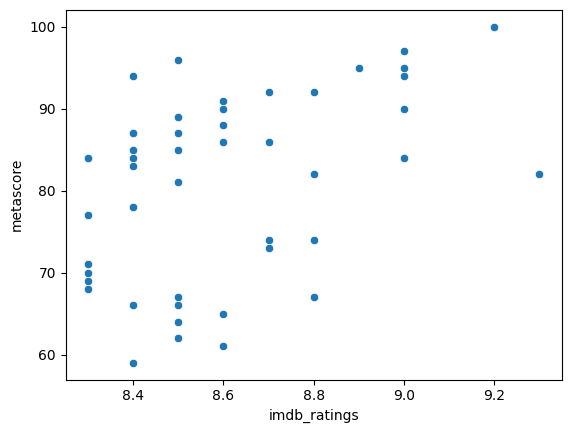

In [ ]:
sns.scatterplot(data = movies, x = 'imdb_ratings', y = 'metascore',)

## Number of votes vs. IMDB ratings

<Axes: xlabel='imdb_ratings', ylabel='number_votes'>

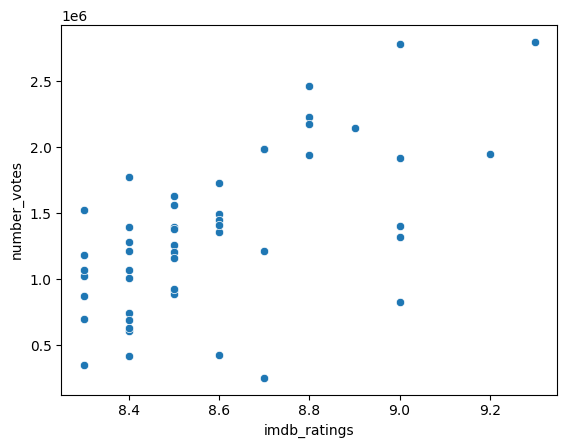

In [ ]:
sns.scatterplot(data = movies, x = 'imdb_ratings', y = 'number_votes',)

## Runtime vs. IMDB ratings

<Axes: xlabel='imdb_ratings', ylabel='movie_runtime'>

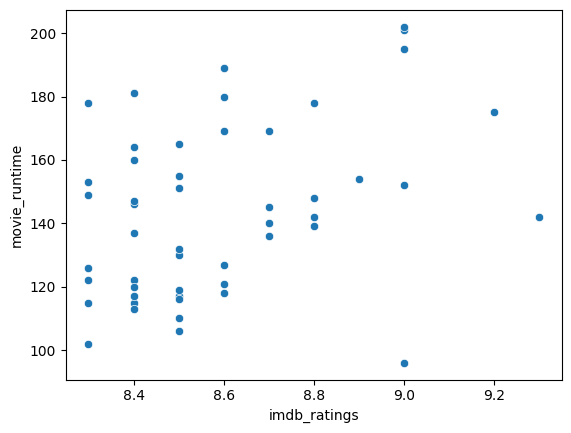

In [ ]:
sns.scatterplot(data = movies, x = 'imdb_ratings', y = 'movie_runtime',)

In [ ]:
movies.sort_values('number_votes', ascending=False)[0:9]

,movie_name,movie_year,movie_runtime,imdb_ratings,metascore,number_votes,us_gross_millions
4,The Shawshank Redemption,1994,142,9.3,82,2796410,28.34
3,The Dark Knight,2008,152,9.0,84,2777274,534.86
6,Inception,2010,148,8.8,74,2465662,292.58
14,Fight Club,1999,139,8.8,67,2230363,37.03
15,Forrest Gump,1994,142,8.8,82,2175921,330.25
8,Pulp Fiction,1994,154,8.9,95,2145068,107.93
28,The Matrix,1999,136,8.7,73,1988546,171.48
2,Interstellar,2014,169,8.7,74,1985194,188.02
5,The Godfather,1972,175,9.2,100,1948193,134.97


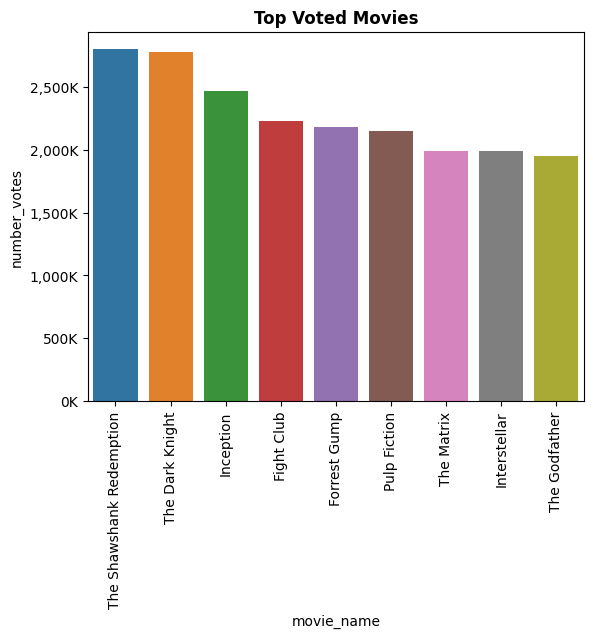

In [ ]:
ax = sns.barplot(x = 'movie_name', y = 'number_votes', data = movies.sort_values('number_votes', ascending=False)[0:9])
ax.set_title("Top Voted Movies", weight = "bold")
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

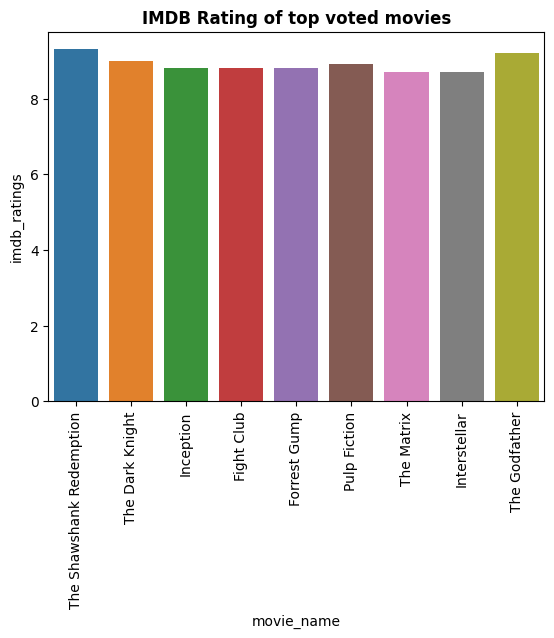

In [ ]:
ax = sns.barplot(x = 'movie_name', y = 'imdb_ratings', data = movies.sort_values('number_votes', ascending=False)[0:9])
ax.set_title("IMDB Rating of top voted movies", weight = "bold")
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

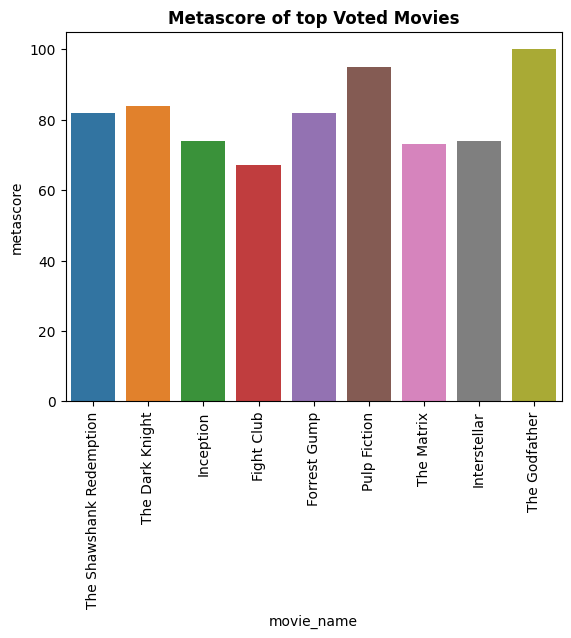

In [ ]:
ax = sns.barplot(x = 'movie_name', y = 'metascore', data = movies.sort_values('number_votes', ascending=False)[0:9])
ax.set_title("Metascore of top Voted Movies", weight = "bold")
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

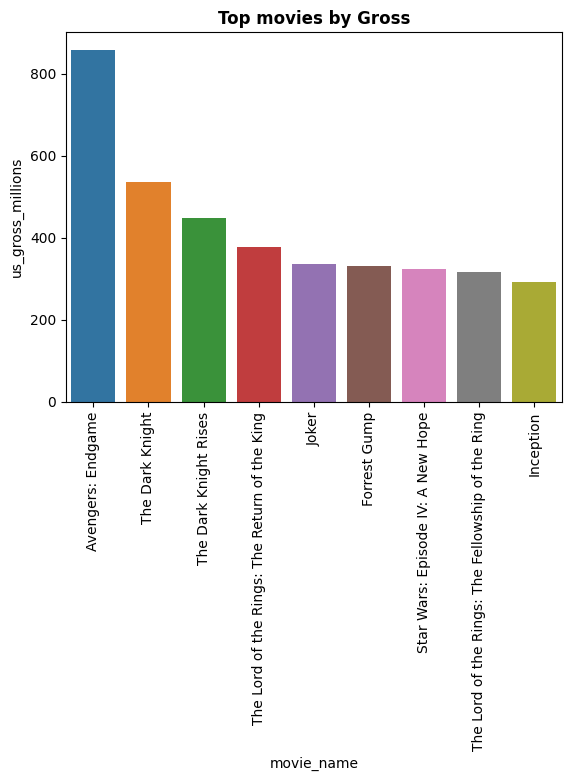

In [ ]:
ax = sns.barplot(x = 'movie_name', y = 'us_gross_millions', data = movies.sort_values('us_gross_millions', ascending=False)[0:9])
ax.set_title("Top movies by Gross", weight = "bold")
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)